## Dataset Formatter

In this notebook the dataset is organized in training and test sets. However we have to be clear about how the dataset is to be used when training by using hugging face.

The complete dataset contains 431698 samples with 12 characteristics that include the corresponding labels in one hot encoding.

The dataset will be organized as follows:

$\mathcal{X}_{train}\in \mathcal{R}^{341698 \times 12 } $

$\mathcal{X}_{test}\in \mathcal{R}^{90000 \times 12 } $


In [4]:
import pandas as pd
import numpy as np
import os

dir_root = os.getcwd()
dir_root

'/home/falconiel/CodePrograms/clasificaion_robos_fge'

Lectura desde CSV

In [5]:
FILE_PATH = "data/raw/dataset_seguimientoValidadosRelatos06122023.csv"
# dataset_total = pd.read_csv(os.path.join(dir_root, 'data/raw/dataset.csv'), converters={'NDD':str})
# dataset_total = pd.read_csv(os.path.join(dir_root, 'data/raw/dataset_validados_full.csv'), converters={'NDD':str})
# dataset_total = pd.read_csv(os.path.join(dir_root, 'data/raw/dataset_seguimientoValidadosRelatos06122023.csv'), converters={'NDD':str})
# dataset_total.shape

Lectura desde SQL

In [6]:
from src.utils import conectar_sql
from sqlalchemy import text

conx = conectar_sql()
DATABASE_NAME = "reportes"
TABLE_NAME = "dataset_RobosDesagregation06122023"
this_query = text(f"SELECT * FROM {DATABASE_NAME}.{TABLE_NAME};")
dataset_total = pd.read_sql(this_query, conx)
dataset_total.shape

2023-12-07 13:18:17.744135: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


conectando con big data database....


(1109335, 6)

In [7]:
dataset_total.sample(5)

,NDD,Presunto_Delito,Relato,delitos_seguimiento,delitos_validados,cantidadPalabras
117203,170101821090851,ROBO,pongo en su conocimiento señor fiscal con fech...,ROBO A PERSONAS,ROBO A PERSONAS,196
838604,170101814024928,ROBO,es el caso señor fiscal que el día y hora seña...,ROBO A UNIDADES ECONOMICAS,ROBO A UNIDADES ECONOMICAS,88
1091767,140101818020085,ROBO,es el caso señor fiscal salí de vacaciones con...,ROBO A DOMICILIO,ROBO A DOMICILIO,51
85290,090101817093220,ROBO,es el caso señor fiscal que el día 18 del mes ...,ROBO A PERSONAS,ROBO A PERSONAS,109
887613,120301820070010,ROBO,es el caso señor fiscal que el día 19 de julio...,OTROS ROBOS,ROBO A INSTITUCIONES EDUCATIVAS,197


Some preprocessing

In [8]:
# dataset_total.RELATO = dataset_total.RELATO.str.lower()
# dataset_total.RELATO = dataset_total.RELATO.str.replace("[^A-Za-z0-9áéíóúÁÉÍÓÚñÑ]+", " ", regex=True)
# dataset_total.RELATO = dataset_total.RELATO.str.strip()
from src.utils import format_crimestory

format_crimestory(dataf=dataset_total, relato_label="Relato")

In [9]:
from utils import camel_case_string_noPoint

new_names = []
for col in dataset_total.columns:
    new_names.append(camel_case_string_noPoint(col))
new_names

['ndd',
 'presuntoDelito',
 'relato',
 'delitosSeguimiento',
 'delitosValidados',
 'cantidadpalabras']

In [10]:
dataset_total.columns = new_names
# dataset_total.sample(5)

<AxesSubplot: >

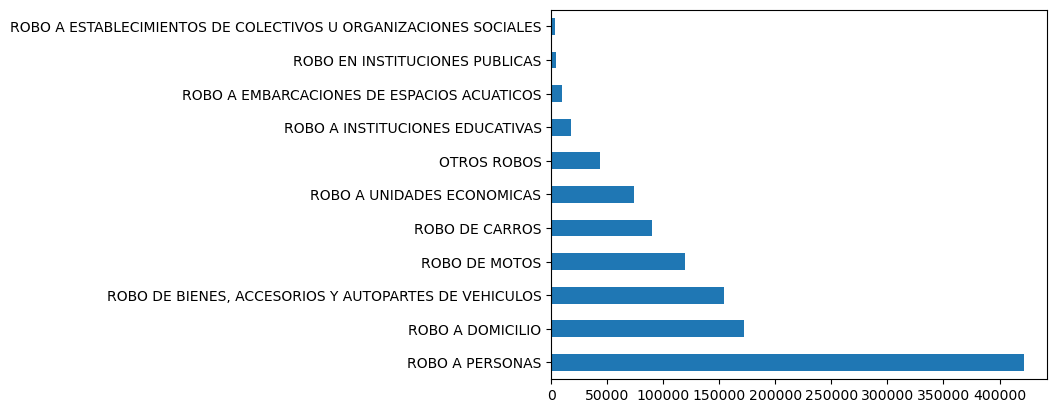

In [11]:
LABELS_COLUMN_NAME = "delitosValidados"
dataset_total[LABELS_COLUMN_NAME].value_counts().plot.barh()

Applying shuffle to the dataset in order to randomly order the samples in the data

In [20]:
dataset_total.rename(columns={"cantidadpalabras": "cantidadPalabras"}, inplace=True)

In [21]:
from sklearn.utils import shuffle

dataset_total_shuffle = shuffle(dataset_total, random_state=42)
dataset_total_shuffle.reset_index(inplace=True)
dataset_total.shape, dataset_total_shuffle.shape

((1109335, 6), (1109335, 7))

In [22]:
dataset_total_shuffle.columns, dataset_total.columns

(Index(['index', 'ndd', 'presuntoDelito', 'relato', 'delitosSeguimiento',
        'delitosValidados', 'cantidadPalabras'],
       dtype='object'),
 Index(['ndd', 'presuntoDelito', 'relato', 'delitosSeguimiento',
        'delitosValidados', 'cantidadPalabras'],
       dtype='object'))

In [23]:
from src.utils import train_valid_test_sizer

TRAIN_SIZE_R, VALID_SIZE_R, TEST_SIZE_R = train_valid_test_sizer(
    dataframe_shape=dataset_total.shape
)

Recomended sizes are: TRAIN: 776534.5, VALID: 221867.0, TEST: 110933.5


Estudio anterior utilizó Test_Size de 90000

In [24]:
TEST_SIZE = 100000
TRAIN_SIZE = dataset_total.shape[0] - TEST_SIZE
train_df = dataset_total_shuffle.iloc[0:TRAIN_SIZE, :]
test_df = dataset_total_shuffle.iloc[TRAIN_SIZE:, :]
# training_sentences = sentences[0:training_size]
# testing_sentences = sentences[training_size:]
# training_labels = labels[0:training_size]
# testing_labels = labels[training_size:]

In [25]:
train_df.tail()

,index,ndd,presuntoDelito,relato,delitosSeguimiento,delitosValidados,cantidadPalabras
1009330,1017248,060101818010156,ROBO,yo martin marcelo illapa avalos con c c no 060...,ROBO A PERSONAS,ROBO A PERSONAS,223
1009331,1092002,030101814090122,ROBO,que el día sábado 20 de septiembre del 2014 a ...,ROBO A PERSONAS,ROBO A PERSONAS,232
1009332,264925,070101814040029,ROBO,el dia y hora indicada en circunstancias que l...,ROBO A PERSONAS,ROBO A PERSONAS,198
1009333,525596,170101821070287,ROBO,es el caso señor fiscal que en el dia y la hor...,ROBO A PERSONAS,ROBO A PERSONAS,85
1009334,988658,090101821122430,ROBO,es el caso señor fiscal que el dí a 12 de dici...,ROBO A PERSONAS,ROBO A PERSONAS,130


In [26]:
test_df.head()

,index,ndd,presuntoDelito,relato,delitosSeguimiento,delitosValidados,cantidadPalabras
1009335,3278,090801816020110,ROBO,es el caso señor fiscal que el día de hoy 23 d...,ROBO DE MOTOS,ROBO DE MOTOS,118
1009336,267786,170501822090091,ROBO,es el caso señor fiscal que el día 12 de septi...,ROBO A DOMICILIO,ROBO A DOMICILIO,194
1009337,277870,120501814110288,ROBO,es el caso señor fiscal que el día miercoles 1...,ROBO A PERSONAS,ROBO A PERSONAS,105
1009338,1092391,090101817083468,ROBO,es el caso señor fiscal que el día 18 de agost...,ROBO A DOMICILIO,ROBO A DOMICILIO,251
1009339,817767,120501818070295,ROBO,es el caso señor fiscal que a las 11h00 del di...,ROBO A DOMICILIO,ROBO A DOMICILIO,174


In [27]:
train_df.shape, test_df.shape

((1009335, 7), (100000, 7))

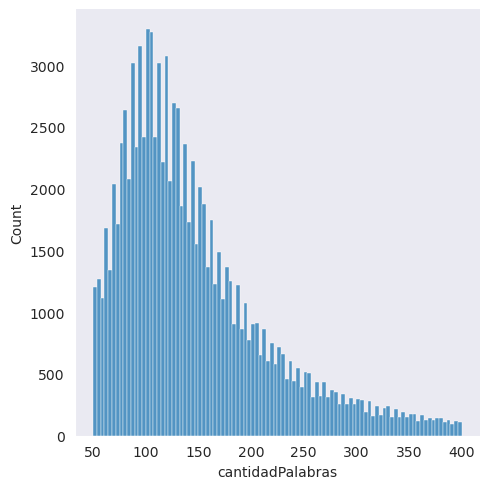

In [28]:
import seaborn as sns

sns.set_style("dark")
sns.displot(test_df.cantidadPalabras)

/tmp/ipykernel_7500/2510673099.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df.cantidadPalabras)


<AxesSubplot: xlabel='cantidadPalabras', ylabel='Density'>

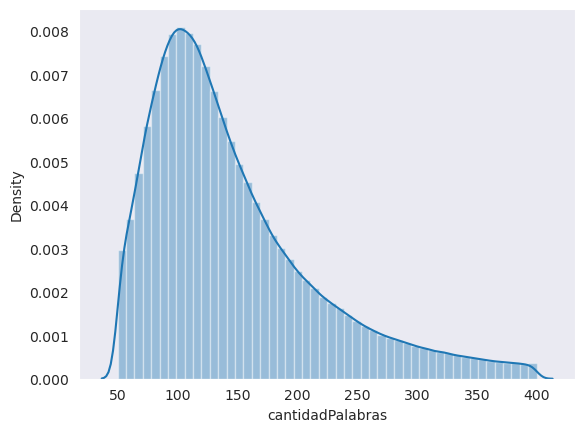

In [29]:
sns.distplot(train_df.cantidadPalabras)

## Generating Validation dataset
Checking some of the bibliography in HuggingFaces, there is a procedure to create the validation dataset from testing set. However, I have also made that from the training set using train test split of sklearn. Let us explore which is the best way to obtain that. In either case, saving the datset should be final because shuffle of the data can be applied. In videos, validation dataset has been obtained from the trainig set, reducing a bit its size. Consider that the operation to split the dataset can be from the dataset dict object that can be created using hugging faces: https://discuss.huggingface.co/t/how-to-split-main-dataset-into-train-dev-test-as-datasetdict/1090


In [30]:
train_df.shape, test_df.shape

((1009335, 7), (100000, 7))

I think since there were some initial problems in memory when applying tokenize to train dataset, it could be ok to lower a bit its size by extracting validation set out of it

In [31]:
TRAIN_SIZE, TEST_SIZE, 0.8 * TRAIN_SIZE, 0.2 * TRAIN_SIZE, TEST_SIZE / (
    TRAIN_SIZE + TEST_SIZE
) * 100

(1009335, 100000, 807468.0, 201867.0, 9.014409533639522)

We could also get 50% of testing cases for validation considering what they recommend in https://discuss.huggingface.co/t/how-to-split-main-dataset-into-train-dev-test-as-datasetdict/1090. However this would lower testing samples to 45000, validation samples to 45000 and training samples would remain at 341669. 

In [32]:
VALID_SIZE = int(0.2 * TRAIN_SIZE)
TRAIN_SIZE -= VALID_SIZE
TRAIN_SIZE, VALID_SIZE

(807468, 201867)

In [33]:
train_df_out = train_df.iloc[0:TRAIN_SIZE, :]
valid_df = train_df.iloc[TRAIN_SIZE:, :]

In [34]:
train_df_out.tail()

,index,ndd,presuntoDelito,relato,delitosSeguimiento,delitosValidados,cantidadPalabras
807463,454295,090101818012209,ROBO,ese el caso señor fiscal que el día de hoy 13 ...,ROBO A DOMICILIO,ROBO A DOMICILIO,151
807464,832989,080101822080259,ROBO,los hechos que denuncio sucedieron el dí a 13 ...,ROBO A DOMICILIO,ROBO A DOMICILIO,107
807465,544067,090101814094312,ROBO,es el caso se or fiscal que el d a de hoy 22 d...,ROBO A PERSONAS,ROBO A PERSONAS,275
807466,619048,090101815032385,ROBO,es el caso se or fiscal que el d a 11 de marzo...,ROBO DE MOTOS,ROBO DE MOTOS,70
807467,10936,100401816100043,ROBO,por medio del presente pongo en su conocimient...,"ROBO DE BIENES, ACCESORIOS Y AUTOPARTES DE VEH...","ROBO DE BIENES, ACCESORIOS Y AUTOPARTES DE VEH...",291


In [35]:
valid_df.head()

,index,ndd,presuntoDelito,relato,delitosSeguimiento,delitosValidados,cantidadPalabras
807468,1035725,091001819060243,ROBO,el casos r fiscal que el día 24 06 2019 a las ...,ROBO A PERSONAS,ROBO A PERSONAS,98
807469,296053,120501817100224,ROBO,es el caso señor fiscal que en el día y hora i...,ROBO A PERSONAS,ROBO A PERSONAS,141
807470,504382,090101814094479,ROBO,es el caso señor fiscal que el 22 de septiembr...,ROBO A PERSONAS,ROBO A PERSONAS,123
807471,708583,170101821051591,ROBO,señor fiscal el dia miercoles 12 de mayo del 2...,ROBO A PERSONAS,ROBO A PERSONAS,55
807472,527489,060101818090429,ROBO,el día 25 de septiembre del 2018 a eso de las ...,ROBO A DOMICILIO,ROBO A DOMICILIO,139


In [36]:
train_df_out.shape, test_df.shape, valid_df.shape

((807468, 7), (100000, 7), (201867, 7))

In [39]:
total_samples = train_df_out.shape[0] + valid_df.shape[0] + test_df.shape[0]
np.array(
    [train_df_out.shape[0], valid_df.shape[0], test_df.shape[0]]
) / total_samples * 100

array([72.78847237, 18.19711809,  9.01440953])

In [43]:
from datetime import datetime

WHEN = datetime.now().strftime("%Y-%m-%d")

train_df_out.to_csv(
    os.path.join(dir_root, f"data/interim/trainset_{WHEN}.csv"), index=False
)
# train_df_out.to_csv(os.path.join(dir_root,'data/interim/trainset_delvalidados.csv'), index=False)
test_df.to_csv(os.path.join(dir_root, f"data/interim/testset_{WHEN}.csv"), index=False)
# test_df.to_csv(os.path.join(dir_root,'data/interim/testset_delvalidados.csv'), index=False)
valid_df.to_csv(
    os.path.join(dir_root, f"data/interim/validset_{WHEN}.csv"), index=False
)
# valid_df.to_csv(os.path.join(dir_root,'data/interim/validset_delvalidados.csv'), index=False)

## Splitting Delitos Validados and Delitos Seguimiento and renaming

The dataset may have both delitos seguimiento and delitos validados. If this is the case it is important to separate them in order to create the set of data to be used

In [51]:
train_df_out.columns

Index(['index', 'ndd', 'presuntoDelito', 'relato', 'delitosSeguimiento',
       'delitosValidados', 'cantidadPalabras'],
      dtype='object')

In [50]:
train_delitos_validados = train_df_out.drop(columns="delitosSeguimiento")
valid_delitos_validados = valid_df.drop(columns="delitosSeguimiento")
test_delitos_validados = test_df.drop(columns="delitosSeguimiento")

train_delitos_seguimiento = train_df_out.drop(columns="delitosValidados")
valid_delitos_seguimiento = valid_df.drop(columns="delitosValidados")
test_delitos_seguimiento = test_df.drop(columns="delitosValidados")

In [52]:
train_delitos_validados.columns

Index(['index', 'ndd', 'presuntoDelito', 'relato', 'delitosValidados',
       'cantidadPalabras'],
      dtype='object')

In [53]:
train_delitos_validados.rename(columns={"delitosValidados": "labels"}, inplace=True)
valid_delitos_validados.rename(columns={"delitosValidados": "labels"}, inplace=True)
test_delitos_validados.rename(columns={"delitosValidados": "labels"}, inplace=True)
train_delitos_seguimiento.rename(columns={"delitosSeguimiento": "labels"}, inplace=True)
valid_delitos_seguimiento.rename(columns={"delitosSeguimiento": "labels"}, inplace=True)
test_delitos_seguimiento.rename(columns={"delitosSeguimiento": "labels"}, inplace=True)

How many repetitions do we have in the datasets? It is kind of important to know this because we would like to know if we are going to train with crime stories from both origins (police and siaf). A way to check this would be the count of repeated ndd in a dataset

In [65]:
def howmany_duplicates(dataset, column2check="ndd"):
    duplicates = dataset[dataset.duplicated(subset="ndd", keep=False)].shape[0]
    print(
        f"There are {duplicates} in {dataset.shape} that corresponds to: {duplicates/dataset.shape[0]*100}%"
    )


howmany_duplicates(dataset=dataset_total, column2check="NDD")
howmany_duplicates(dataset=train_delitos_validados)
howmany_duplicates(dataset=train_delitos_seguimiento)
howmany_duplicates(dataset=valid_delitos_validados)
howmany_duplicates(dataset=valid_delitos_seguimiento)
howmany_duplicates(dataset=test_delitos_validados)
howmany_duplicates(dataset=test_delitos_seguimiento)

There are 945492 in (1109335, 6) that corresponds to: 85.230520987799%
There are 501260 in (807468, 6) that corresponds to: 62.078001852705%
There are 501260 in (807468, 6) that corresponds to: 62.078001852705%
There are 31362 in (201867, 6) that corresponds to: 15.535971704141835%
There are 31362 in (201867, 6) that corresponds to: 15.535971704141835%
There are 7822 in (100000, 6) that corresponds to: 7.822%
There are 7822 in (100000, 6) that corresponds to: 7.822%


In [54]:
train_delitos_validados_huggingface = train_delitos_validados[["relato", "labels"]]
valid_delitos_validados_huggingface = valid_delitos_validados[["relato", "labels"]]
test_delitos_validados_huggingface = test_delitos_validados[["relato", "labels"]]
train_delitos_seguimiento_huggingface = train_delitos_seguimiento[["relato", "labels"]]
valid_delitos_seguimiento_huggingface = valid_delitos_seguimiento[["relato", "labels"]]
test_delitos_seguimiento_huggingface = test_delitos_seguimiento[["relato", "labels"]]
# train_df_huggingface = train_df_out[['relato', 'labels']]
# test_df_huggingface = test_df[['relato', 'labels']]
# valid_df_huggingface = valid_df[['relato', 'labels']]

In [56]:
print(
    train_delitos_seguimiento_huggingface.shape,
    train_delitos_validados_huggingface.shape,
)
print(
    valid_delitos_seguimiento_huggingface.shape,
    valid_delitos_validados_huggingface.shape,
)
print(
    test_delitos_seguimiento_huggingface.shape, test_delitos_validados_huggingface.shape
)

(807468, 2) (807468, 2)
(201867, 2) (201867, 2)
(100000, 2) (100000, 2)


In [59]:
valid_delitos_validados_huggingface.head()

,relato,labels
807468,el casos r fiscal que el día 24 06 2019 a las ...,ROBO A PERSONAS
807469,es el caso señor fiscal que en el día y hora i...,ROBO A PERSONAS
807470,es el caso señor fiscal que el 22 de septiembr...,ROBO A PERSONAS
807471,señor fiscal el dia miercoles 12 de mayo del 2...,ROBO A PERSONAS
807472,el día 25 de septiembre del 2018 a eso de las ...,ROBO A DOMICILIO


In [60]:
valid_delitos_seguimiento_huggingface.head()

,relato,labels
807468,el casos r fiscal que el día 24 06 2019 a las ...,ROBO A PERSONAS
807469,es el caso señor fiscal que en el día y hora i...,ROBO A PERSONAS
807470,es el caso señor fiscal que el 22 de septiembr...,ROBO A PERSONAS
807471,señor fiscal el dia miercoles 12 de mayo del 2...,ROBO A PERSONAS
807472,el día 25 de septiembre del 2018 a eso de las ...,ROBO A DOMICILIO


In [58]:
# train_df_huggingface.to_csv(os.path.join(dir_root,'data/interim/trainsethugf.csv'), index=False)
# test_df_huggingface.to_csv(os.path.join(dir_root,'data/interim/testsethugf.csv'), index=False)
# valid_df_huggingface.to_csv(os.path.join(dir_root,'data/interim/validsethugf.csv'), index=False)
train_delitos_validados_huggingface.to_csv(
    os.path.join(dir_root, f"data/interim/trainsethugf_delvalidados_{WHEN}.csv"),
    index=False,
)
test_delitos_validados_huggingface.to_csv(
    os.path.join(dir_root, f"data/interim/testsethugf_delvalidados_{WHEN}.csv"),
    index=False,
)
valid_delitos_validados_huggingface.to_csv(
    os.path.join(dir_root, f"data/interim/validsethugf_delvalidados_{WHEN}.csv"),
    index=False,
)

train_delitos_seguimiento_huggingface.to_csv(
    os.path.join(dir_root, f"data/interim/trainsethugf_delseguimiento_{WHEN}.csv"),
    index=False,
)
test_delitos_seguimiento_huggingface.to_csv(
    os.path.join(dir_root, f"data/interim/testsethugf_delseguimiento_{WHEN}.csv"),
    index=False,
)
valid_delitos_seguimiento_huggingface.to_csv(
    os.path.join(dir_root, f"data/interim/validsethugf_delseguimiento_{WHEN}.csv"),
    index=False,
)

## Saving to sql

In [62]:
from src.utils import save_df_in_sql

save_df_in_sql(
    dataf=train_delitos_validados_huggingface,
    database="machinelearning",
    name_table="train_delitos_validados_hf",
)

save_df_in_sql(
    dataf=valid_delitos_validados_huggingface,
    database="machinelearning",
    name_table="valid_delitos_validados_hf",
)
save_df_in_sql(
    dataf=test_delitos_validados_huggingface,
    database="machinelearning",
    name_table="test_delitos_validados_hf",
)

conexion con base es: <sqlalchemy.engine.base.Connection object at 0x7f04b43ef3d0>
conexion con base es: <sqlalchemy.engine.base.Connection object at 0x7f04b43eedd0>
conexion con base es: <sqlalchemy.engine.base.Connection object at 0x7f04d56c7e50>
